In [47]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

In [55]:
s = os.listdir()
s.sort()
info = {}
for file in s:
    if '256KB_8way.pickle' in file and '32KB' not in file:
        with open(file,'rb') as f:
            print(file.split('_')[0])
            info[file.split('_')[0]] = pickle.load(f)

FIFO
LFU
LIFO
LRFU
LRU2
LRU
MFU
MRU
PLRU
R


In [56]:
print(info.keys())
print(info['LRU'].keys())

dict_keys(['FIFO', 'LFU', 'LIFO', 'LRFU', 'LRU2', 'LRU', 'MFU', 'MRU', 'PLRU', 'R'])
dict_keys(['434.zeusmp', '459.GemsFDTD', '401.bzip2', '471.omnetpp', '435.gromacs', '483.xalancbmk', '444.namd', '447.dealII', '458.sjeng', '462.libquantum', '482.sphinx3', '437.leslie3d', '456.hmmer', '403.gcc', '429.mcf', '433.milc', '450.soplex', '436.cactusADM', '481.wrf', '445.gobmk', '464.h264ref', '473.astar', '470.lbm'])


In [57]:
traces = []
for k in info['R']:
    a = info['R'][k]
    if type(a)==type({}):
        traces.append(k)
traces.sort()

In [59]:
hitRates = {}
for alg in info:
    print(alg)
    hitRates[alg] = []
    for k in traces:
        a = info[alg][k]
        if type(a)==type({}):
            hits = info[alg][k]['hits']
            miss = info[alg][k]['miss']
            hitRates[alg].append(hits/(hits+miss))

FIFO
LFU
LIFO
LRFU
LRU2
LRU
MFU
MRU
PLRU
R


In [60]:
for alg in hitRates:
    print(alg, round(np.mean(hitRates[alg])*100,2))

FIFO 96.09
LFU 96.02
LIFO 96.08
LRFU 96.51
LRU2 96.08
LRU 96.08
MFU 96.61
MRU 96.09
PLRU 96.75
R 96.72


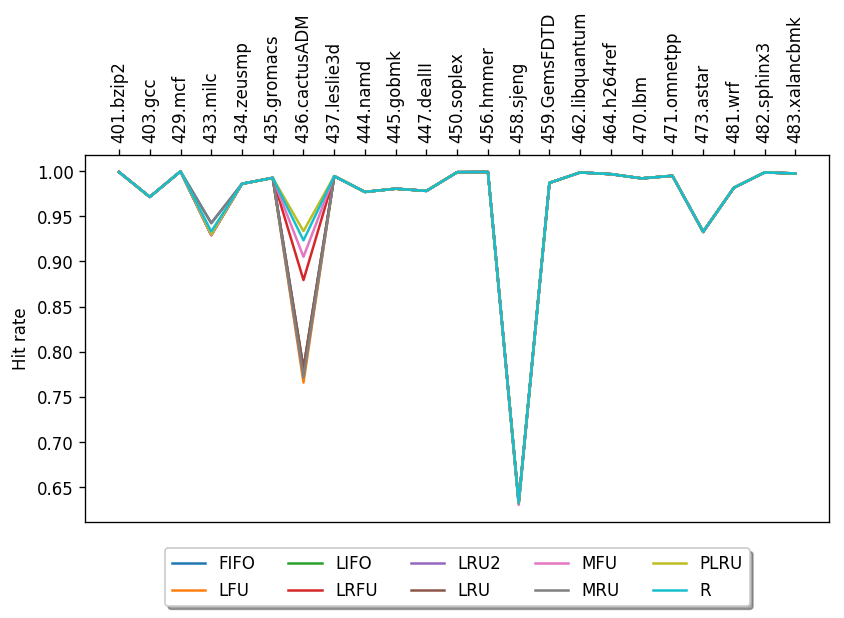

In [61]:
fig = plt.figure(num=None, figsize=(8, 4.5), dpi=120, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
for alg in hitRates:
    ax.plot(hitRates[alg],label=alg)
plt.xticks(range(len(traces)), traces, rotation='vertical')
ax.xaxis.tick_top()
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.ylabel('Hit rate')
plt.show()

[0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532, 0.9996283041665532]


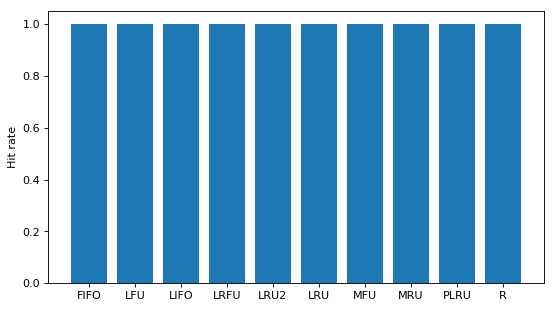

In [62]:
tr = traces.index('429.mcf')
plt.figure(num=None, figsize=(8,4.5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][tr] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
print([hitRates[alg][tr] for alg in hitRates])
#plt.ylim(.7,.8)
plt.ylabel('Hit rate')
plt.show()

['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '483.xalancbmk']
[0.7716039324316984, 0.7659189252801767, 0.7814651868749962, 0.8793766608931456, 0.7818504235591847, 0.7814651868749962, 0.905104034021529, 0.7716039324316984, 0.933580367614369, 0.9233348823267893]


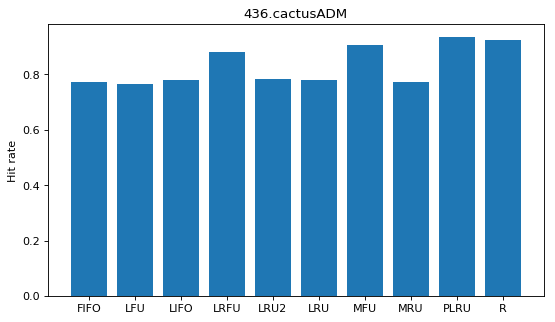

In [63]:
print(traces)
tr = traces.index('436.cactusADM')
plt.figure(num=None, figsize=(8,4.5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][tr] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
plt.title('436.cactusADM')
print([hitRates[alg][tr] for alg in hitRates])
#plt.ylim(.7,.8)
plt.ylabel('Hit rate')
plt.show()

[0.6322992066910263, 0.6336329660863887, 0.6335496061241785, 0.6335496061241785, 0.6333412062186532, 0.6335496061241785, 0.630493074176473, 0.6322992066910263, 0.6332022729483029, 0.633257846256443]


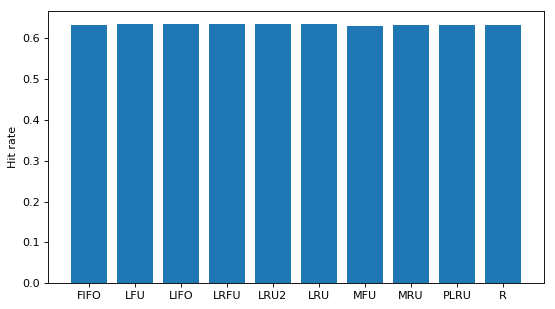

In [64]:
tr = traces.index('458.sjeng')
plt.figure(num=None, figsize=(8,4.5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(hitRates)),[hitRates[alg][tr] for alg in hitRates])
plt.xticks(range(len(hitRates)), [alg for alg in hitRates])
print([hitRates[alg][tr] for alg in hitRates])
#plt.ylim(.7,.8)
plt.ylabel('Hit rate')
plt.show()

In [65]:
setCache = info['R']['436.cactusADM']['setCache']
wayCache = info['R']['436.cactusADM']['wayCache']

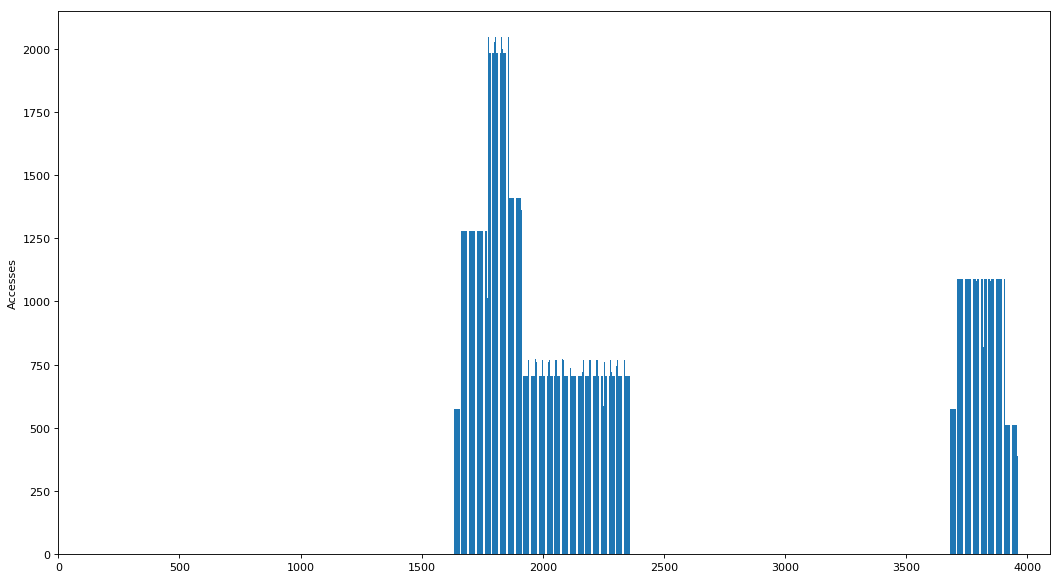

4096 8


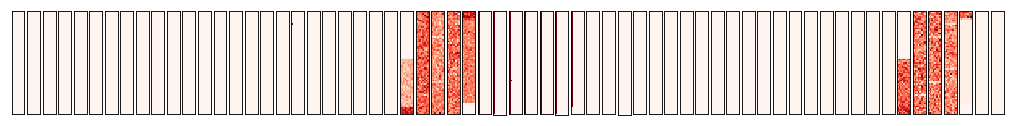

In [66]:
setSize = len(setCache)
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,setSize)
plt.bar(range(setSize), setCache)
plt.ylabel('Accesses')
plt.show()

setLen = 
print(len(wayCache), len(wayCache[0]))
plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
for i in range(setSize // setLen):
    plt.subplot(1, setSize // setLen, i + 1)
    plt.imshow(wayCache[i * setLen:(i + 1) * setLen], cmap='Reds', interpolation='nearest')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()

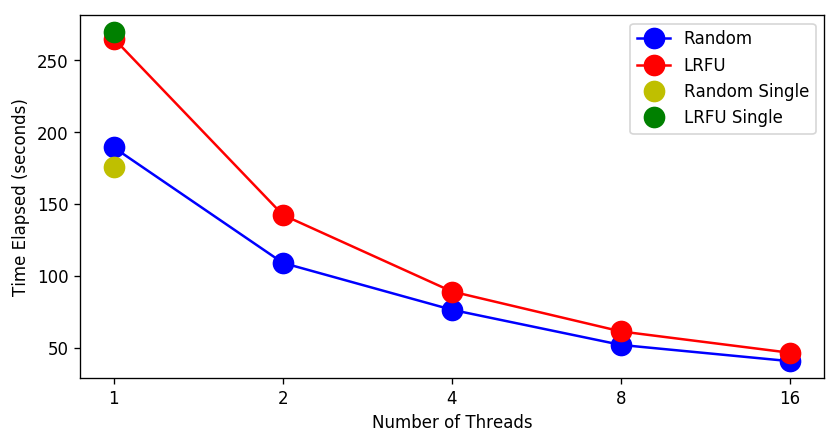

In [65]:
rTimes = [189.4268,109.1838,76.5985,52.1622,40.859]
lrfuTimes = [265.1673,142.5444,89.291,61.5362,46.6924]
plt.figure(num=None, figsize=(8, 4), dpi=120, facecolor='w', edgecolor='k')
plt.plot(rTimes,'bo-', markersize = 12, label='Random')
plt.plot(lrfuTimes, 'ro-', markersize = 12, label='LRFU')
plt.plot([175.7334], 'yo', markersize = 12, label='Random Single')
plt.plot([269.8925], 'go', markersize = 12, label='LRFU Single')
plt.xticks(range(len(rTimes)),[2**a for a in range(len(rTimes))])
plt.legend()
plt.xlabel('Number of Threads')
plt.ylabel('Time Elapsed (seconds)')
plt.show()